<a href="https://colab.research.google.com/github/AriannaHeartbell/sdproject/blob/main/diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade diffusers invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 35.3 MB/s eta 0:00:00


In [4]:
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

# model = "stabilityai/stable-diffusion-xl-base-1.0"
model = "cagliostrolab/animagine-xl-3.0"

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    use_safetensors=True)

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

# cpuモード
# pipe.enable_model_cpu_offload()

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.25.1",
  "_name_or_path": "cagliostrolab/animagine-xl-3.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
# LoRAウェイトの読み込み
pipe.load_lora_weights(".", weight_name="/content/drive/MyDrive/SD/models/Lora/ubel_frieren-000002.safetensors")

In [7]:
!pip install diffusers[peft]

In [8]:
pipe.set_adapters(["ubel_frieren-000002.safetensors"], adapter_weights=[0.8])

ValueError: PEFT backend is required for `set_adapters()`.

  0%|          | 0/27 [00:00<?, ?it/s]

(-0.5, 895.5, 1343.5, -0.5)

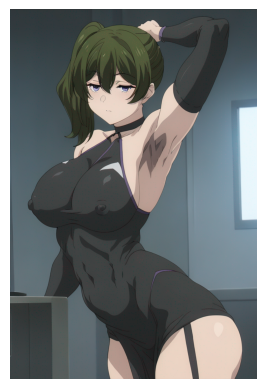

In [17]:
import matplotlib.pyplot as plt

prompt = "1girl, solo focusing, anime screencap, purple eyes, jitome, bangs, green hair, hair between eyes, side ponytail, voluptuous, bare dress, [muscular, toned], seductive pose, showing armpits, ((masterpiece, best quality, highly detailed))"
negative_prompt = "sfw, lowres, bad anatomy, bad hands, bad eyes, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, multiple girls, 2girls, missing hands, hair intake, looking away, looking side, small breasts, medium breasts, (ear peek), extra fingers, looking away, 2girls, boy, twintails"

# デフォルトサイズ(1024x1024)

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    guidance_scale=6,
    num_inference_steps=27,
    height=1344,
    width=896
    ).images[0]

image.save("output.png")

plt.imshow(image)
plt.axis('off')